In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from community import community_louvain

In [53]:
def undirected(year):
    G=nx.Graph()
    df=pd.read_csv(f"graphs/{year}.csv")
    for index, row in df.iterrows():
        source=row["source"]
        target=row["target"]
        weight=float(row[f"{year}"])
        if G.has_edge(row["source"],row["target"]):
            G[source][target]['weight']+=weight
        else:

            G.add_edge(source,target,weight=weight)

    return G



In [ ]:
def degree_dist(year):
    G=undirected(year)
    degree_sequence = [sum(weight for _, _, weight in G.edges(node, data='weight')) for node in G.nodes()]
    bin_edges = np.arange(0, max(degree_sequence) + 100001, 10000)
    # Plot degree distribution
    plt.figure(figsize=(10,5))
    plt.hist(degree_sequence,bins=bin_edges, alpha=1,color='navy')
    plt.xlabel('Degree (Trillion US$)')
    plt.ylabel('Frequency')
    plt.title(f'Degree Distribution {year}')
    
    plt.savefig(f"Degree_dist/{year}")

In [ ]:
G=undirected(2019)
i=G.edges(data='weight')
for weight in i:
    print(weight[2])

In [ ]:
def avg_degree(year):
    G=undirected(year)
    total_degree = sum(weight for _, _, weight in G.edges(data='weight'))
    num_nodes = G.number_of_nodes()
    average_degree = total_degree / num_nodes

    return average_degree

    



In [ ]:
def avg_cluster(year):
    G=undirected(year)
    return nx.average_clustering(G,weight='weight')
    

In [ ]:
x=[]
y=[]
for i in range(2000,2022):
    x.append(i)
    y.append(avg_cluster(i))
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o')
plt.xlabel("Year")
plt.ylabel("Avg weighted clustering coefficient")
plt.title("Average weighted clustering coefficient over the years")
plt.savefig("Degree_dist/avg_cluster_plot")


In [ ]:
x=[]
y=[]
for i in range(2000,2022):
    x.append(i)
    y.append(avg_degree(i))
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o')
plt.xlabel("Year")
plt.ylabel("Avg degree (Million US$)")
plt.title("Average weighted degree over the years")
plt.savefig("Degree_dist/avg_deg_plot")


In [ ]:
for i in [2000,2005,2010,2015,2020]:
    degree_dist(i)

In [54]:
G=undirected(2003)
partition = community_louvain.best_partition(G, weight='weight')
print(partition)
cluster={}
for k,v in partition.items():
    if v not in cluster:
        cluster[v]=[k]
    else:
        cluster[v].append(k)

    

{'Aruba': 0, 'United Kingdom': 1, 'Panama': 0, 'Netherlands Antilles': 3, 'Netherlands': 1, 'Colombia': 3, 'Venezuela': 3, 'United States': 0, 'Germany': 1, 'France': 1, 'China': 4, 'Ireland': 1, 'Sweden': 1, 'Japan': 4, 'Costa Rica': 0, 'Spain': 1, 'Belgium': 1, 'Italy': 1, 'Mexico': 0, 'Brazil': 3, 'Peru': 3, 'Ecuador': 3, 'Canada': 0, 'Anguila': 0, 'Guyana': 0, 'Trinidad and Tobago': 0, 'Antigua and Barbuda': 0, 'Jamaica': 0, 'Other Asia, nes': 4, 'Hong Kong, China': 4, 'Korea, Rep.': 4, 'Australia': 4, 'Indonesia': 4, 'Gabon': 4, 'Barbados': 0, 'Albania': 1, 'Greece': 1, 'Serbia, FR(Serbia/Montenegro)': 1, 'Turkey': 1, 'Austria': 1, 'Bulgaria': 1, 'Russian Federation': 0, 'Switzerland': 0, 'Andorra': 1, 'Portugal': 1, 'United Arab Emirates': 4, 'India': 3, 'Iran, Islamic Rep.': 4, 'Singapore': 4, 'Argentina': 3, 'Chile': 3, 'Armenia': 1, 'Israel': 1, 'Belarus': 0, 'Ukraine': 0, 'New Zealand': 4, 'Saudi Arabia': 4, 'Azerbaijan': 1, 'Turkmenistan': 0, 'Georgia': 1, 'Burundi': 2, 'Ken

In [70]:
All=['Aruba', 'United Kingdom', 'Curaçao', 'Netherlands', 'Colombia', 'Panama', 'United States', 'Venezuela', 'Germany', 'France', 'China', 'Ireland', 'Belgium', 'Mexico', 'Brazil', 'Spain', 'Ecuador', 'Costa Rica', 'Singapore', 'Free Zones', 'Japan', 'Canada', 'Afghanistan', 'India', 'Iraq', 'Kazakhstan', 'Pakistan', 'Uzbekistan', 'Iran, Islamic Rep.', 'Turkey', 'United Arab Emirates', 'Hong Kong, China', 'Switzerland', 'Saudi Arabia', 'Russian Federation', 'Italy', 'Korea, Rep.', 'Other Asia, nes', 'Indonesia', 'Angola', 'South Africa', 'Portugal', 'Botswana', 'Argentina', 'Albania', 'Greece', 'Malta', 'Serbia, FR(Serbia/Montenegro)', 'Bulgaria', 'Cyprus', 'Egypt, Arab Rep.', 'Bunkers', 'Cayman Islands', 'Romania', 'Bosnia and Herzegovina', 'Hungary', 'Andorra', 'Norway', 'Sweden', 'Denmark', 'Vietnam', 'Chile', 'Thailand', 'Armenia', 'Georgia', 'Belarus', 'Azerbaijan', 'Antigua and Barbuda', 'Barbados', 'Special Categories', 'Australia', 'Guyana', 'Trinidad and Tobago', 'Malaysia', 'Austria', 'Czech Republic', 'Poland', 'Slovak Republic', 'Israel', 'Burundi', 'Kenya', 'Tanzania', 'Uganda', 'Congo, Dem. Rep.', 'Rwanda', 'South Sudan', 'Benin', 'Nigeria', 'Togo', 'Bangladesh', "Cote d'Ivoire", 'Ghana', 'Burkina Faso', 'Mali', 'Niger', 'Bahrain', 'Qatar', 'Bahamas, The', 'Turks and Caicos Isl.', 'Croatia', 'Slovenia', 'Ukraine', 'Belize', 'Jamaica', 'Guatemala', 'El Salvador', 'Nicaragua', 'Honduras', 'Bermuda', 'Bolivia', 'Peru', 'Suriname', 'Gabon', 'Brunei', 'Namibia', 'Zambia', 'Central African Republic', 'Cameroon', 'Congo, Rep.', 'Heard Island and McDonald Isla', 'Comoros', 'Mauritius', 'Madagascar', 'Cape Verde', 'Liberia', 'Finland', 'Dominican Republic', 'Haiti', 'Algeria', 'Estonia', 'Lithuania', 'Latvia', 'Ethiopia(excludes Eritrea)', 'Kuwait', 'European Union', 'Fiji', 'New Zealand', 'Guinea', 'Gambia, The', 'Senegal', 'Guinea-Bissau', 'Grenada', 'Greenland', 'Iceland', 'Jordan', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'East Timor', 'St. Kitts and Nevis', 'St. Lucia', 'Lebanon', 'Syrian Arab Republic', 'Libya', 'Sri Lanka', 'Lesotho', 'Eswatini', 'Mozambique', 'Luxembourg', 'Macao', 'Morocco', 'Moldova', 'Maldives', 'North Macedonia', 'Myanmar', 'Mongolia', 'Montenegro', 'Mauritania', 'Montserrat', 'Anguila', 'British Virgin Islands', 'Malawi', 'Nepal', 'Oman', 'Philippines', 'Palau', 'Guam', 'Paraguay', 'Occ.Pal.Terr', 'French Polynesia', 'Solomon Islands', 'Sierra Leone', 'Sao Tome and Principe', 'Sudan', 'Seychelles', 'Tajikistan', 'Turkmenistan', 'Tunisia', 'Uruguay', 'St. Vincent and the Grenadines', 'Dominica', 'Samoa', 'American Samoa', 'Zimbabwe']

In [74]:
North_Am=['Aruba', 'Curaçao', 'Panama', 'United States', 'Venezuela', 'Canada', 'Mexico', 'Antigua and Barbuda', 'Barbados', 'Bahamas, The', 'Turks and Caicos Isl.', 'Cayman Islands', 'Bermuda', 'Jamaica', 'Guatemala', 'El Salvador', 'Nicaragua', 'Honduras', 'Dominican Republic', 'Haiti', 'Cuba', 'Costa Rica', 'Trinidad and Tobago', 'Guyana', 'Suriname', 'Belize', 'St. Kitts and Nevis', 'St. Lucia', 'Dominica', 'St. Vincent and the Grenadines', 'Grenada', 'Antigua and Barbuda', 'St. Vincent and the Grenadines']

Europe=['United Kingdom', 'Netherlands', 'Germany', 'France', 'Ireland', 'Belgium', 'Spain', 'Switzerland', 'Italy', 'Norway', 'Sweden', 'Denmark', 'Portugal', 'Romania', 'Bosnia and Herzegovina', 'Hungary', 'Andorra', 'Finland', 'Serbia, FR(Serbia/Montenegro)', 'Bulgaria', 'Cyprus', 'Belarus', 'Latvia', 'Lithuania', 'Estonia', 'Moldova', 'North Macedonia', 'Luxembourg', 'Malta', 'San Marino', 'Monaco', 'Liechtenstein', 'Holy See']

Asia=['China', 'Hong Kong, China', 'Turkey', 'United Arab Emirates', 'Korea, Rep.', 'Japan', 'Singapore', 'Iran, Islamic Rep.', 'Vietnam', 'Malaysia', 'Israel', 'Kazakhstan', 'Pakistan', 'Uzbekistan', 'Iraq', 'Thailand', 'Azerbaijan', 'Georgia', 'Armenia', 'Qatar', 'Lebanon', 'Oman', 'Kuwait', 'Jordan', 'Yemen, Rep.', 'Syrian Arab Republic', 'Tajikistan', 'Kyrgyz Republic', 'Turkmenistan', 'Bahrain', 'Afghanistan']
South_Am=['Colombia', 'Ecuador', 'Brazil', 'Argentina', 'Chile', 'Peru', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Venezuela']
Africa=['South Africa', 'Angola', 'Nigeria', 'Tanzania', 'Kenya', 'Uganda', 'Congo, Dem. Rep.', 'Sudan', 'Ethiopia(excludes Eritrea)', 'Egypt, Arab Rep.', 'Ghana', "Cote d'Ivoire", 'Madagascar', 'Cameroon', 'Zambia', 'Niger', 'Mozambique', 'Morocco', 'Uzbekistan', 'Mali', 'Burkina Faso', 'Mauritania', 'Somalia', 'Central African Republic', 'Nepal', 'Chad', 'Zimbabwe', 'Botswana', 'Rwanda', 'Tunisia', 'Senegal', 'South Sudan', 'Gambia, The', 'Namibia', 'Eswatini', 'Lesotho', 'Guinea', 'Burundi', 'Sierra Leone', 'Togo', 'Libya', 'Djibouti', 'Guinea-Bissau', 'Equatorial Guinea', 'Comoros', 'Mauritius', 'Western Sahara', 'Cape Verde', 'Sao Tome and Principe', 'Seychelles', 'Eritrea', 'Saint Helena']
Oceania=['Australia', 'New Zealand', 'Guam', 'French Polynesia', 'Fiji', 'Papua New Guinea', 'New Caledonia', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Marshall Islands', 'Federated States of Micronesia', 'Palau', 'Kiribati', 'Tuvalu', 'Nauru', 'Cook Islands', 'Niue', 'Tokelau', 'American Samoa', 'Wallis and Futuna', 'Norfolk Island', 'Guam']


In [59]:
def modularity(year):
    G=undirected(year)
    partition = community_louvain.best_partition(G, weight='weight')
    cluster={}
    for k,v in partition.items():
        if v not in cluster:
            cluster[v]=[k]
        else:
            cluster[v].append(k)

    clusters=[value for key,value in cluster.items()]
    mod=nx.community.modularity(G,clusters,weight='weight')
    return mod

        

In [80]:

def modularity2(year):
    Na=[]
    Sa=[]
    As=[]
    Ocea=[]
    Eur=[]
    Afri=[]
    Rest=[]
    def find_con(country):
        if country in Asia:
            As.append(country)
        elif country in Europe:
            Eur.append(country)
        elif country in Africa:
            Afri.append(country)
        elif country in North_Am:
            Na.append(country)
        elif country in South_Am:
            Sa.append(country)
        elif country in Oceania:
            Ocea.append(country)
        else:
            Rest.append(country)
            
            

    
    G=undirected(year)
    l=G.nodes()
    for co in l:
       
        find_con(co)
            

    clusters=[Na, Eur, As, Sa, Afri, Ocea,Rest]
    # for i in range(len(clusters)):
    #     for j in clusters[i]:
    #         if not G.has_node(j):
    #             clusters[i].remove(j)

    mod=nx.community.modularity(G,clusters,weight='weight')
    return mod


In [60]:
modularity(2006)

0.4126228591863474

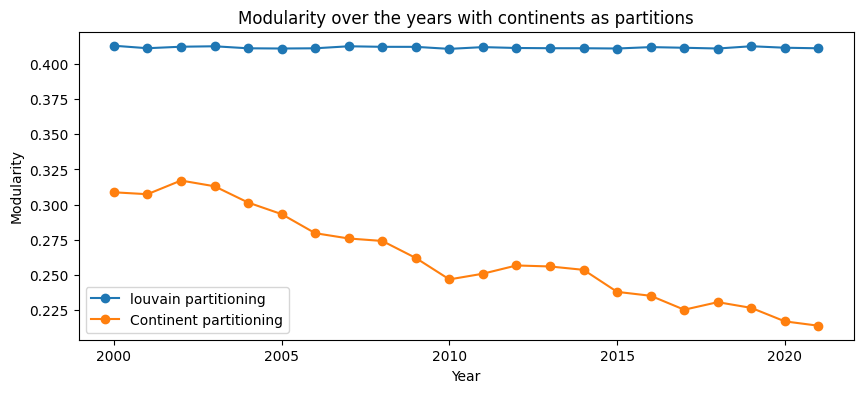

In [83]:
x=[]
y=[]
z=[]
for i in range(2000,2022):
    x.append(i)
    y.append(modularity(i))
    z.append(modularity2(i))
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o',label="louvain partitioning")
plt.plot(x,z,marker='o',label="Continent partitioning")
plt.xlabel("Year")
plt.ylabel("Modularity")
plt.legend()
plt.title("Modularity over the years with continents as partitions")
plt.savefig("Degree_dist/modularity")